In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
print(df.shape)

(4340, 8)


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
df.duplicated().sum()

np.int64(763)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df['year']=df['year'].astype(int)
df['selling_price']=df['selling_price'].astype(int)
df['km_driven']=df['km_driven'].astype(int)

In [ ]:
df=pd.get_dummies(df,columns=['fuel','seller_type','transmission','owner'],drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['selling_price','name'],axis=1)
y=df['selling_price']
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_pred,y_test)
mse=np.sqrt(mean_squared_error(y_test,y_pred))
print("r2",r2)
print("mse",mse)

r2 -0.11288089902749454
mse 372447.03799385484


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
X = df[['year', 'km_driven', 'fuel_Petrol', 'fuel_Diesel', 'transmission_Manual']]

In [ ]:
import numpy as np
df['log_km_driven'] = np.log(df['km_driven'] + 1)

In [ ]:
df = df[df['selling_price'] < df['selling_price'].quantile(0.99)]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop(['selling_price', 'name'], axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.5016550776508195


In [ ]:
df = df[df['selling_price'] < df['selling_price'].quantile(0.95)]

In [ ]:
import numpy as np
df['log_km_driven'] = np.log(df['km_driven'] + 1)

In [ ]:
df['price_per_km'] = df['selling_price'] / (df['km_driven'] + 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop(['selling_price', 'name'], axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.5577032965079383


In [ ]:
import numpy as np
df['selling_price'] = np.log(df['selling_price'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop(['selling_price', 'name'], axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.6616848191807441


In [ ]:
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train R²: 0.6340972248381025
Test R²: 0.6616848191807441


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.43041277588852056
Test RMSE: 0.4341568497104035


In [ ]:
df.to_csv("cleaned_car-dekho_csv",index=False)
print("successfull")

successfull


In [ ]:
from google.colab import files
files.download('cleaned_car-dekho_csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
check=pd.read_csv('/content/cleaned_car-dekho_csv')
print(check.head())

                       name  year  selling_price  km_driven  fuel_Diesel  \
0             Maruti 800 AC  2007      11.002100      70000        False   
1  Maruti Wagon R LXI Minor  2007      11.813030      50000        False   
2      Hyundai Verna 1.6 SX  2012      13.304685     100000         True   
3    Datsun RediGO T Option  2017      12.429216      46000        False   
4     Honda Amaze VX i-DTEC  2014      13.017003     141000         True   

   fuel_Electric  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          False     False         True                    True   
1          False     False         True                    True   
2          False     False        False                    True   
3          False     False         True                    True   
4          False     False        False                    True   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                         False                 True   
1                         Fa

In [ ]:
mape=np.mean(np.mean((y_test-y_pred)/y_test))*100
accuracy=100-mape
print("model accuracy is:",round(accuracy,2),"%")

model accuracy is: 100.3 %


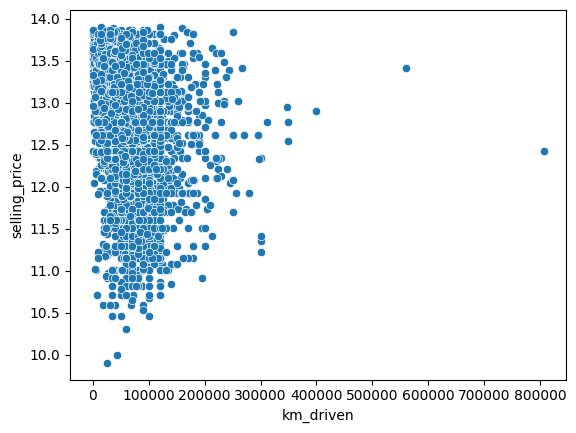

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='km_driven',y='selling_price',data=df)

plt.show()

<Axes: xlabel='Fuel_Type', ylabel='selling_price'>

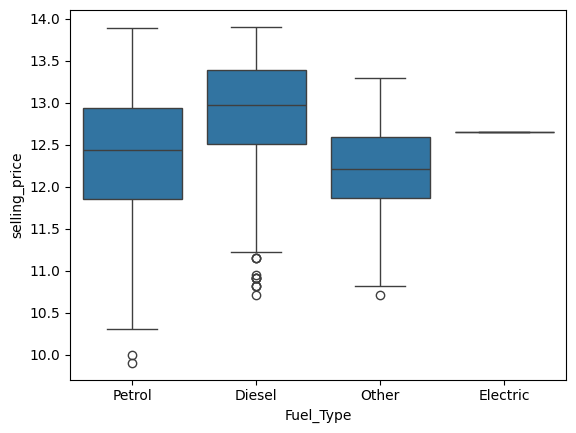

In [ ]:
sns.boxplot(x='Fuel_Type',y='selling_price',data=df)


<Axes: xlabel='year', ylabel='selling_price'>

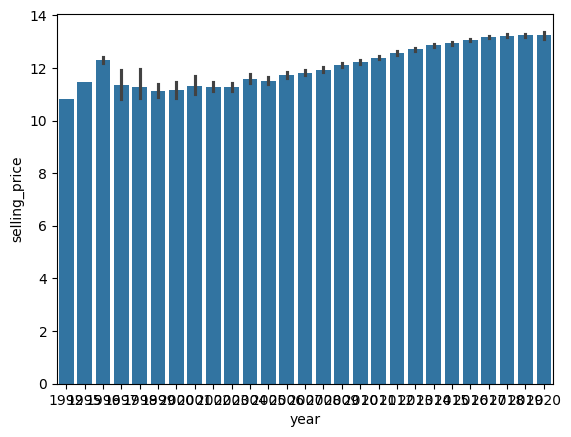

In [ ]:
sns.barplot(x='year',y='selling_price',data=df)

In [ ]:
def get_fuel_type(row):
    if row['fuel_Diesel']:
        return 'Diesel'
    elif row['fuel_Petrol']:
        return 'Petrol'
    elif row['fuel_Electric']:
        return 'Electric'
    else:
        return 'Other'

df['Fuel_Type'] = df.apply(get_fuel_type, axis=1)